# Regression Analysis 


## Linear Model

The simplest model we can think of is the **linear model**, where the response $\textbf{y}$ depends linearly from the covariates $\textbf{x}_i$:

$$ \textbf{y}  =  a_1 \textbf{x}_1  + \dots + a_m \textbf{x}_{m} $$

The $a_i$ are termed *parameters* of the model or *coefficients*.

This equation can be rewritten in a more compact (matricial) form as

$$ \textbf{y}  = X \textbf{w}$$

where $$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right), 
 X = \left( \begin{array}{c} x_{11}  \dots x_{1m} \\ x_{21}  \dots x_{2m}\\ \vdots \\ x_{n1}  \dots x_{nm} \end{array} \right),
 \textbf{w} = \left( \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right) $$
 
 **Linear regression** is the technique for creating linear models.


# Import Libraries & Data

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

In [76]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Advertising.csv to Advertising (1).csv
User uploaded file "Advertising.csv" with length 3862 bytes


In [77]:
data = pd.read_csv("Advertising.csv")

In [78]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Simple Linear Regresion 

Linear Regression attempts to predict a continuous outcome feature (**Y**) from one or more explanatory features (**X**).  

$$Y = \beta_0 + \beta_1 X$$

$\beta_0$ is called the intercept term, and represents the expected mean value of Y when all explanatory features equal 0.  
$\beta_1$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in X.  






In [79]:
import statsmodels.formula.api as smf

In [80]:
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [81]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo linel predictivo seria 
Sales = 7.032594 + 0.047537 * TV

In [82]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [83]:
lm.rsquared

0.611875050850071

In [84]:
lm.rsquared_adj

0.6099148238341623

In [111]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.47e-42
Time:                        17:07:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [13]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

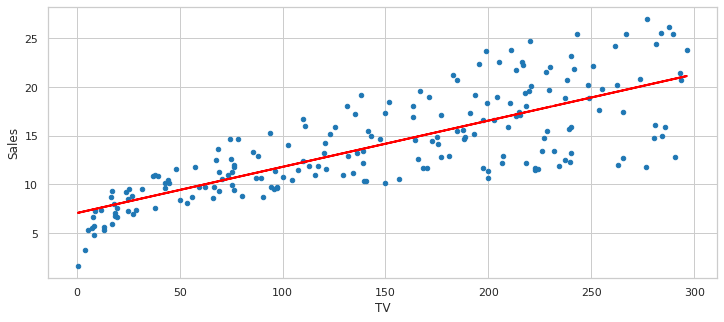

In [14]:
data.plot(kind ="scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [15]:
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"]

In [16]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [17]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [18]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [19]:
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [20]:
error = RSE/sales_m
error

0.2323876890168014

* Un 23% del modelo que no queda explicado por su varianza

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

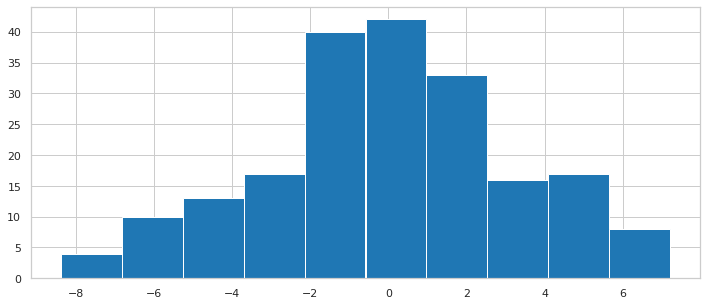

In [21]:
plt.hist((data["Sales"]-data["sales_pred"]))

# Multiple Lineal Regression

A variable that is one or zero depending on the value of another variable is called an "indicator." The variable country_ZM that we created is 1 if the location_country_code variable is "ZM" and 0 otherwise. These indicator variables are how we use categorical variables in regression.

Let's run a multivariate linear regression using loan_amount as our independent variable, and lender_count, the country ZM indicator, and the sectors Food, Personal Use, and Retail indicators as our dependent variables.

Y=β0+β1X1+β2X2+β3X3+β4X4+β5X5 

β0  is called the intercept term, and represents the expected mean value of Y when all explanatory features equal 0.

β1  is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in  X1 . In our example,  X1  will be TV money spent.

β2  is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in  X2 . In our example,  X2  will be the Radio money spent.

β3  is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in  X3 . In our example,  X3  will be the Newspaper money spend.


There are 2 ways of implementing a Linear regression 


1.   **statsmodel package** with the **OLS model**
2.   **sickitlearn package**

## Import Libraries & Data

In [107]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [68]:
data = pd.read_csv("Advertising.csv")

In [69]:
cols = ["TV", "Radio", "Newspaper"]
X = data[cols]
Y = data["Sales"]

In [113]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

## TV + Newspaper

In [30]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [31]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

The predicted model will be 
Sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

In [32]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [33]:
lm2.rsquared

0.6458354938293271

In [34]:
lm2.rsquared_adj

0.6422399150864777

In [35]:
sales_pred = lm2.predict(data[["TV","Newspaper"]])

In [36]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [37]:
SSD = sum((data["Sales"]-sales_pred)**2)
SSD

1918.5618118968266

In [38]:
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

3.1207198602528847

In [39]:
sales_m = np.mean(data["Sales"])
error = RSE/sales_m
error

0.2225508903728211

In [108]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           3.95e-45
Time:                        17:04:34   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.0

## TV + Radio

In [41]:
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [109]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           4.83e-98
Time:                        17:05:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

Adding these features have improved the model slightly the F-statitic has decreased and the R2 has increased from 0.612 to 0.897. 

In [43]:
sales_pred = lm3.predict(data[["TV","Radio"]])

In [44]:
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [45]:
SSD = sum((data["Sales"]-sales_pred)**2)
SSD

556.9139800676187

In [46]:
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.6813609125080016

In [47]:
error = RSE/sales_m
error

0.11990450436855063

## TV + Newspaper + Radio

In [48]:
lm4 = smf.ols(formula="Sales~TV+Newspaper+Radio", data=data).fit()

In [110]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        17:05:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [50]:
sales_pred = lm4.predict(data[["TV","Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))

In [51]:
RSE

1.6855103734147445

In [52]:
error = RSE/sales_m
error

0.12020041885646242

## Model evaluation

Switching over to sklearn's Linear Regression package will allow to use other sklearn metrics and functions to evaluate the model performance. An important function we are going to use here is sklearn's [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [122]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

In [131]:
linear = LinearRegression(fit_intercept=False)
r2_cross_val_score = cross_val_score(linear, X_train, y_train, cv = 5).mean()
print('cross validation R2: {}'.format(r2_cross_val_score))

cross validation R2: 0.8495355702920613


The cross validation R2 score is very similar to the training R2 which gives us confidence that the model will perform well on the unseen test data!

In [71]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

Coeff and intercept: [0.04391531 0.20027962 0.00184368] 2.8802552863313213


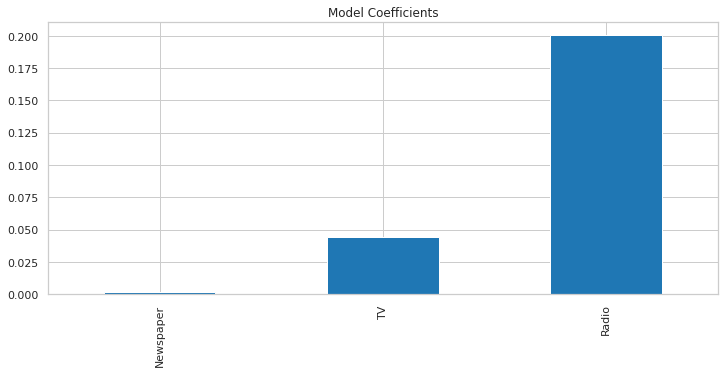

In [74]:
from pandas import Series
coef = Series(reg.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [119]:
r2_cross_val_score = cross_val_score(reg, X_train, y_train, cv = 5).mean()

print('Cross validation R2: {}'.format(r2_cross_val_score))

Cross validation R2: 0.8982992836563113


This is comparable to the cross validation R2 so we know we are not overfitting! 

In [124]:
mse_scorer = make_scorer(mean_squared_error)
mse_cross_val_score = cross_val_score(reg, X_train, y_train, scoring=mse_scorer, cv =5).mean()

print(f'cross validation MSE: {mse_cross_val_score:.6}')
print(f'cross validation RMSE: {np.sqrt(mse_cross_val_score):.4}')

cross validation MSE: 2.65284
cross validation RMSE: 1.629


Another useful metric to evaluate a models performance is the mean squared error which tells us how much error our model produced on average. 

In [129]:
mse_scorer = make_scorer(mean_squared_error)
mse_cross_val_score = cross_val_score(reg, X_test, y_test, scoring=mse_scorer, cv =5).mean()

print(f'cross validation MSE: {mse_cross_val_score:.6}')
print(f'cross validation RMSE: {np.sqrt(mse_cross_val_score):.4}')

cross validation MSE: 3.96218
cross validation RMSE: 1.991


In [130]:
# Compute Score for training and testing sets 
print('Training Score: {}'.format(reg.score(X_train, y_train)))
print('Testing Score: {}'.format(reg.score(X_test, y_test)))

Training Score: 0.9065727532450597
Testing Score: 0.8649018906637792


## Variance Inflation Factor
* VIF = 1 : The variables are not correlated
* VIF < 5 : The variables are correlated and can stay in the model.
* VIF >5 : The variables are high correlated and should be removed from the model. 

In [ ]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239286

In [ ]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_t = smf.ols(formula = "TV~Newspaper+Radio", data=data).fit()
rsquared_t = lm_t.rsquared
VIF= 1/(1-rsquared_t)
VIF

1.00461078493965

In [ ]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula = "Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF= 1/(1-rsquared_r)
VIF

1.1449519171055351